# **Stanford Car Dataset: Vehicle Classification**


The Stanford Car Dataset is a large-scale dataset primarily used for training and evaluating machine learning models in the field of computer vision, specifically for tasks related to object detection and recognition of cars. The dataset was created by Stanford University and contains images of various car models from different viewpoints.

The objective of building a machine learning model using the Stanford Car Dataset is to develop an algorithm that can accurately identify and classify different car models within images. This task is often referred to as car make and model recognition. By training a model on this dataset, researchers and developers aim to create robust and efficient systems that can automatically recognize cars in real-world scenarios, such as self-driving car applications, traffic monitoring, and security surveillance.

The dataset provides labeled annotations for each image, including information about the car's make, model, and year of manufacture. It covers a wide range of car models and includes variations in terms of lighting conditions, backgrounds, and viewpoints. This diversity allows models trained on the dataset to learn and generalize well to different environments, making them more capable of accurately recognizing cars in real-world settings.

Overall, the Stanford Car Dataset serves as a valuable resource for training and benchmarking machine learning models focused on car recognition, enabling researchers and developers to advance the state-of-the-art in computer vision and contribute to various applications involving car detection and identification.






**Importing Libraries**

In [6]:
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt





from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [7]:

import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt



from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Flatten, Input, Conv1D, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import efficientnet

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

**Loading Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.io import loadmat
annots = loadmat('/content/drive/MyDrive/Colab Notebooks/images/cars_annos.mat')


In [ ]:


train_car = "/content/drive/MyDrive/Colab Notebooks/car_train"
test_car = "/content/drive/MyDrive/Colab Notebooks/car_data/car_data/test"

In [ ]:

def get_car_class(car):

  car_class = car.replace("/","").replace("\\","")[48::][:-9]
  return car_class

def get_test_car_class(car):

  car_class = car.replace("/","").replace("\\","")[47::][:-9]
  return car_class

**Printing random images**

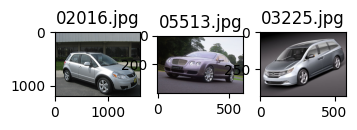

In [ ]:
import random
for i in range(3):
    file = random.choice(os.listdir('/content/drive/MyDrive/Colab Notebooks/images/cars_test/cars_test'))
    image_path= os.path.join('/content/drive/MyDrive/Colab Notebooks/images/cars_test/cars_test', file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

**Some Analysis of data**

In [ ]:
fig, ax = plt.subplots(figsize=(19,8))

sns.countplot(x=df_train_labels["Make"],ax=ax,order=df_train_labels['Make'].value_counts().index)
plt.title('Barplot of Make in the Training Set', y = 1.02)
plt.ylabel('Count'),
plt.xticks(rotation = 90)

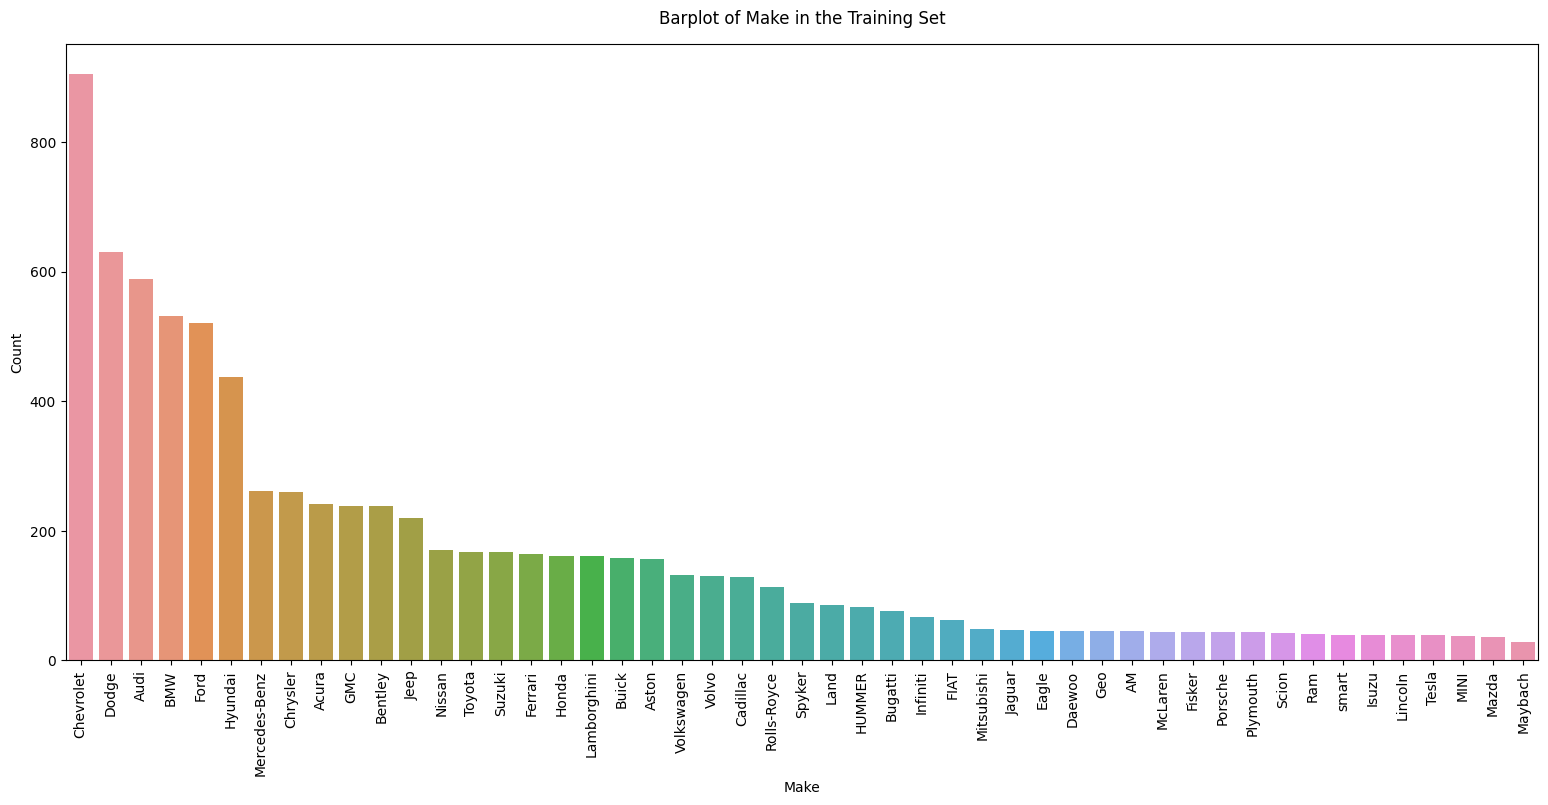

In [ ]:
fig, ax = plt.subplots(figsize=(19,8))

sns.countplot(x=df_test_labels["Make"],ax=ax,order=df_test_labels['Make'].value_counts().index)
plt.title('Barplot of Make in the Training Set', y = 1.02)
plt.ylabel('Count'),
plt.xticks(rotation = 90)

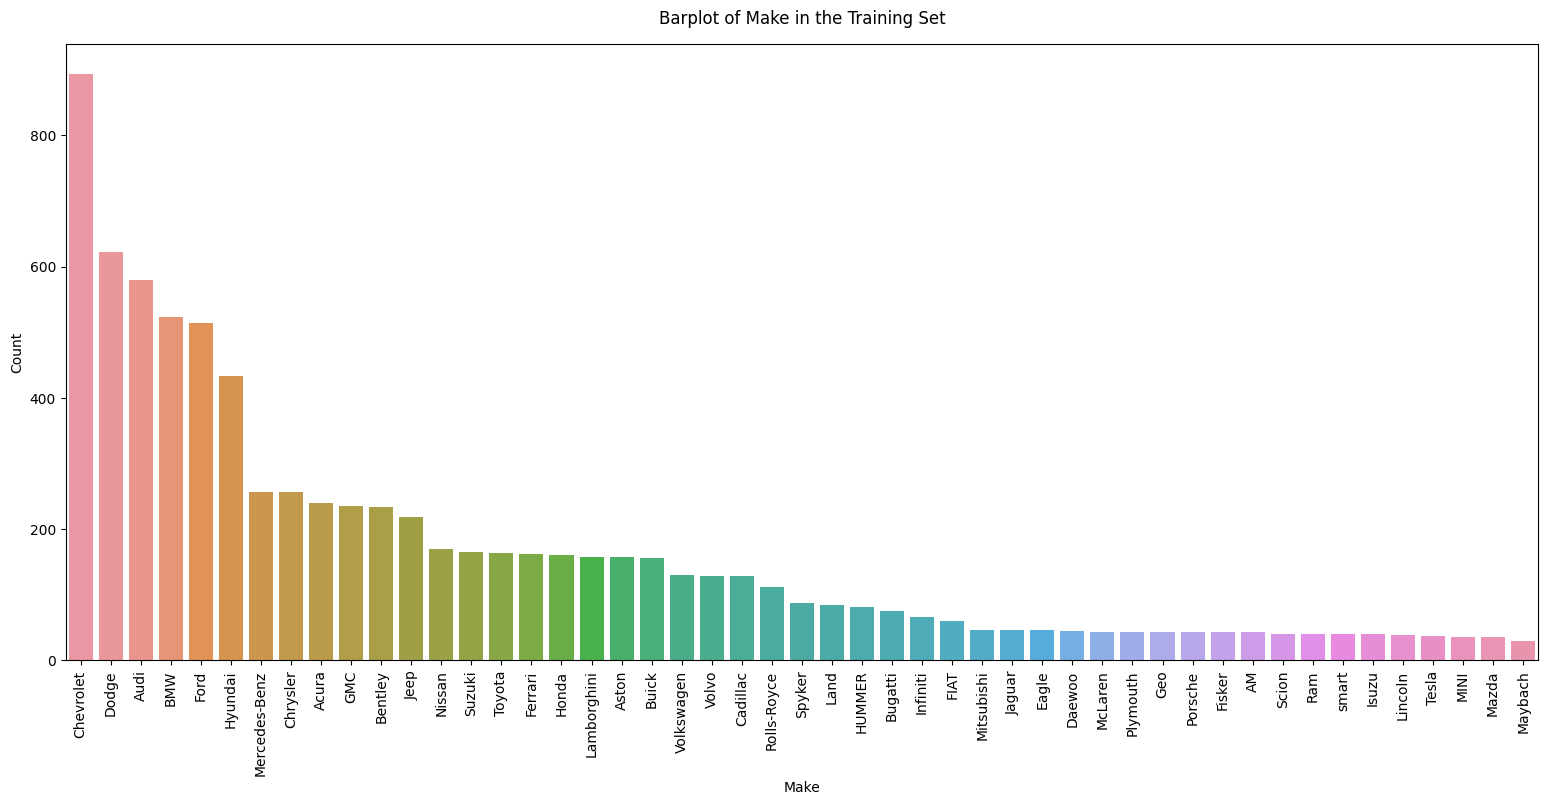

**Defining variables**

In [ ]:
img_width, img_height = 224, 224
train_samples = len(train_car)
validation_samples = len(test_car)


batch_size = 32

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_car,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_car,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 408 images belonging to 10 classes.
Found 2040 images belonging to 50 classes.


## **Using  Mobilenet v1 for Training**

**Setting up the model for training**

In [ ]:

mobilenet_model = MobileNetV2(include_top=False,
                                    weights='imagenet',
                                    input_shape=(224, 224, 3))


for layer in mobilenet_model.layers:
    layer.trainable = False

## adding some extra layers
x = GlobalAveragePooling2D()(mobilenet_model.output)
x = BatchNormalization()(x)
x = Dense(units=1024,
          activation='relu',kernel_regularizer=regularizers.l2(0.01),
          kernel_initializer='random_uniform',
          bias_initializer='zeros')(x)

x = BatchNormalization()(x)
output = Dense(units=10, activation='softmax')(x)

model_1 = Model(inputs=mobilenet_model.input, outputs=output)

**Selecting the optimizers , Compiling  and TRAINING THE MODEL**


opt = tf.keras.optimizers.Adam(lr=0.0001)

model_1.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])



history_1 = model_1.fit_generator(train_generator,
                           steps_per_epoch=len(train_generator),
                          epochs=20)

**Saving the model**

In [ ]:
import pickle
model_1.save('model',save_format='h5')

**Loading the Model**

In [11]:
from tensorflow.keras.models import load_model
savedModel=load_model("C:\\Users\\ifrod\\Downloads\\model")

In [ ]:
from tensorflow.keras.preprocessing import image
image_path=path="C:\\Users\\ifrod\\Downloads\\archive (3)\\car_data\\car_data\\train\\Rolls-Royce Phantom Sedan 2012\\03248.jpg"
img=image.load_img(image_path,target_size=(224,224,3))
img_array=image.img_to_array(img)
image_batche=np.expand_dims(img_array,axis=0)

In [ ]:
image_batch, classes_batch = next(validation_generator)

**Creating Labels DataFrame**

In [8]:
name=pd.read_csv("C:\\Users\\ifrod\\Downloads\\Untitled spreadsheet - Sheet1 (2).csv")
name.drop(columns=['index'],inplace=True)
name.rename(columns={'name': 'Car -->'},inplace=True)
name

,Car -->
0,AM General Hummer SUV 2000
1,Acura TL Type-S 2008
2,Acura TSX Sedan 2012
3,Acura ZDX Hatchback 2012
4,Aston Martin V8 Vantage Convertible 2012
5,Aston Martin V8 Vantage Coupe 2012
6,Aston Martin Virage Convertible 2012
7,Aston Martin Virage 2012
8,Audi TT RS Coupe 2012
9,Audi TTS Coupe 2012


**Predicting the Images and Printing the Result**

**Predicting the Single Image By Specifying manually**

In [ ]:
def predict_class(model):
    '''
    This function will predict what is the next car, check whether the prediction
    was correct and lastly plot the image of the car
    '''
    image_batch, classes_batch = next(validation_generator)
    predicted= model.predict(image_batch)
    
    
    for i in range(0,3):
        image = image_batch[i]
        pred = predicted[i]
        the_pred = np.argmax(pred)
        #print("The Car in the Above Image is: ",name.iloc[the_pred])
        
        plt.figure(i)
        plt.imshow(image)
        
        print("The Car in The  Image is: ",name.iloc[the_pred])
        
  
    
predict_class(savedModel)   

In [ ]:
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input


#my_image = load_img("C:\\Users\\ifrod\\Downloads\\archive (3)\\car_data\\car_data\\test\\smart fortwo Convertible 2012\\04973.jpg", target_size=(224, 224))
#my_image = load_img("C:\\Users\\ifrod\\Downloads\\archive (3)\\car_data\\car_data\\test\\Lamborghini Aventador Coupe 2012\\06318.jpg", target_size=(224, 224))
my_image=load_img("C:\\Users\\ifrod\\Downloads\\download (2).jpeg",target_size=(224, 224))
#my_image=load_img("C:\\Users\\ifrod\\Downloads\\archive (3)\\car_data\\car_data\\test\\Mercedes-Benz Sprinter Van 2012\\04541.jpg", target_size=(224, 224))
#my_image=load_img("C:\\Users\\ifrod\\Downloads\\download (4).jpeg",target_size=(224, 224))



plt.imshow(my_image)


my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)


prediction = savedModel.predict(my_image)
for i in range(0,3):
        
        
        pred = prediction[i]
        the_pred = np.argmax(pred)
        print(the_pred)
        
        plt.figure(i)
        
        #plt.imshow(my_image)
        
        
        
    
        
        print("The Car in The  Image is: ",name.iloc[the_pred])

## **Using   EfficientNetB0 for Trianing**

**Viewing the architecture of EfficientNetB0**

In [2]:
!pip install tf-nightly-gpu
import tensorflow as tf
IMG_SHAPE = (224, 224, 3)
model0 = tf.keras.applications.EfficientNetB0(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
tf.keras.utils.plot_model(model0) 
model0.summary() 

  Using cached tf-nightly-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tf-nightly-gpu
Failed to build tf-nightly-gpu


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\ifrod\AppData\Local\Temp\pip-install-zjrkrajs\tf-nightly-gpu_cc3ff5630bd64962b5b897690f2dfc6c\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tf-nightly-gpu" package has been removed!
  
  Please install "tf-nightly" instead.
  
  Other than the name, the two packages have been identical
  since tf-nightly 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tf-nightly-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tf-nightly-gpu
ERROR: Could not build wheels for tf-nightly-gpu, which is required to install pyproject.toml-

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                   

**Defining the Model**

In [ ]:
base_model = efficientnet.EfficientNetB1(weights='imagenet', include_top=False)

## adding some extra layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(50, activation='softmax')(x)
model_2 = Model(inputs=base_model.input, outputs=predictions)

## fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

27018416/27018416 [==============================] - 2s 0us/step


**Selecting the optimizer and Compiing the Model**

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.01)

model_2.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])





**Training the model**

In [ ]:
history_2 = model_2.fit(train_generator,
                    steps_per_epoch=len(train_generator) ,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator),
                    epochs=20)

Epoch 1/20
64/64 [==============================] - 125s 1s/step - loss: 3.7497 - accuracy: 0.0781 - val_loss: 3.9776 - val_accuracy: 0.0137
Epoch 2/20
64/64 [==============================] - 81s 1s/step - loss: 3.0099 - accuracy: 0.3062 - val_loss: 4.0941 - val_accuracy: 0.0167
Epoch 3/20
64/64 [==============================] - 80s 1s/step - loss: 2.3636 - accuracy: 0.4712 - val_loss: 4.2167 - val_accuracy: 0.0172
Epoch 4/20
64/64 [==============================] - 78s 1s/step - loss: 1.8526 - accuracy: 0.5864 - val_loss: 4.2842 - val_accuracy: 0.0250
Epoch 5/20
64/64 [==============================] - 82s 1s/step - loss: 1.4971 - accuracy: 0.6621 - val_loss: 4.2313 - val_accuracy: 0.0402
Epoch 6/20
64/64 [==============================] - 81s 1s/step - loss: 1.2000 - accuracy: 0.7368 - val_loss: 3.9552 - val_accuracy: 0.0725
Epoch 7/20
64/64 [==============================] - 79s 1s/step - loss: 1.0390 - accuracy: 0.7544 - val_loss: 3.5369 - val_accuracy: 0.1314
Epoch 8/20
64/64 [=

**Analysing the training Result**

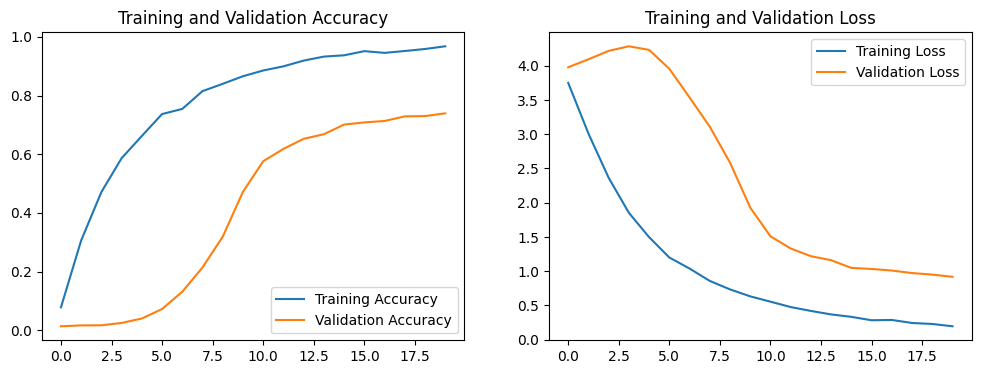

In [ ]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_2, label='Training Accuracy')
plt.plot(epochs_range, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_2, label='Training Loss')
plt.plot(epochs_range, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
name=pd.read_csv("/content/Untitled spreadsheet - Sheet1 (2).csv")
name.drop(columns=['index'],inplace=True)
name.rename(columns={'name': 'Car -->'},inplace=True)
name

,Car -->
0,AM General Hummer SUV 2000
1,Acura TL Type-S 2008
2,Acura TSX Sedan 2012
3,Acura ZDX Hatchback 2012
4,Aston Martin V8 Vantage Convertible 2012
5,Aston Martin V8 Vantage Coupe 2012
6,Aston Martin Virage Convertible 2012
7,Aston Martin Virage 2012
8,Audi TT RS Coupe 2012
9,Audi TTS Coupe 2012


**Predicting The Car's**

In [ ]:
def predict_class(model):
    '''
    This function will predict what is the next car, check whether the prediction
    was correct and lastly plot the image of the car
    '''
    image_batch, classes_batch = next(validation_generator)
    predicted= model.predict(image_batch)


    for i in range(0,30):
        image = image_batch[i]
        pred = predicted[i]
        the_pred = np.argmax(pred)
        #print(pred)

        plt.figure(i)
        plt.imshow(image)

        print("The Car in The  Image is: ",name.iloc[the_pred])
        val_pred = max(pred)
        print("Probability is ",str(val_pred)[:4],'\n\n\n')



predict_class(model_2)

1.The Car in The  Image is:  Car -->    Maybach Landaulet Convertible 2012
Name: 31, dtype: object
Probability is  0.69 
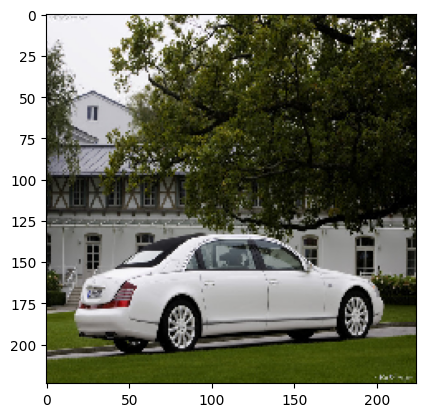

2.The Car in The  Image is:  Car -->    Maybach Landaulet Convertible 2012
Name: 31, dtype: object
Probability is  0.96 
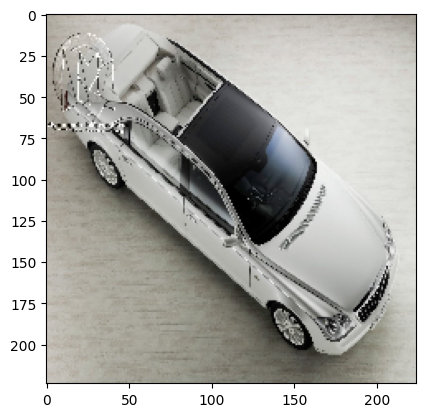

3.The Car in The  Image is:  Car -->    Land Rover LR2 SUV 2012
Name: 30, dtype: object
Probability is  0.89 
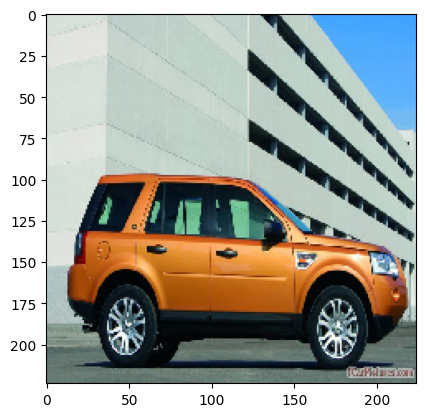

4.The Car in The  Image is:  Car -->    Suzuki SX4 Sedan 2012
Name: 43, dtype: object
Probability is  0.53 
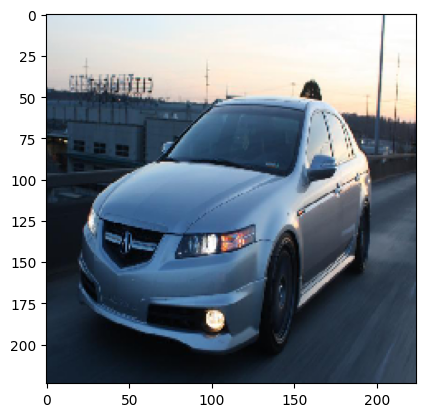

5.The Car in The  Image is:  Car -->    Rolls-Royce Phantom Drophead Coupe Convertible...
Name: 41, dtype: object
Probability is  0.34 
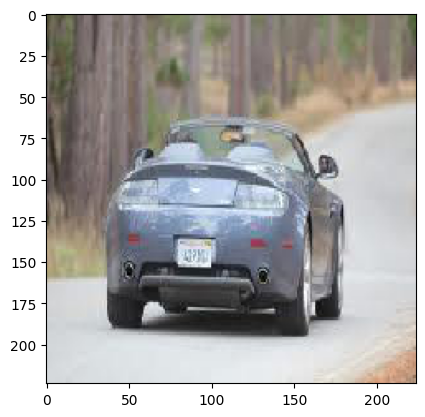

6.The Car in The  Image is:  Car -->    BMW X6 SUV 2012
Name: 13, dtype: object
Probability is  0.99 
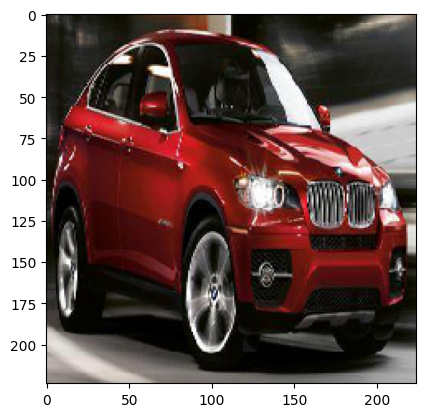

7.The Car in The  Image is:  Car -->    Mitsubishi Lancer Sedan 2012
Name: 37, dtype: object
Probability is  0.74 
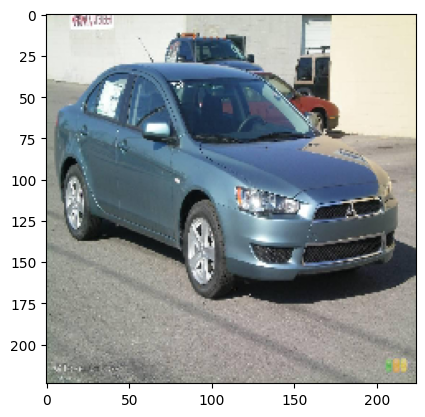


8.The Car in The  Image is:  Car -->    Nissan 240SX Coupe 1998
Name: 38, dtype: object
Probability is  0.56 
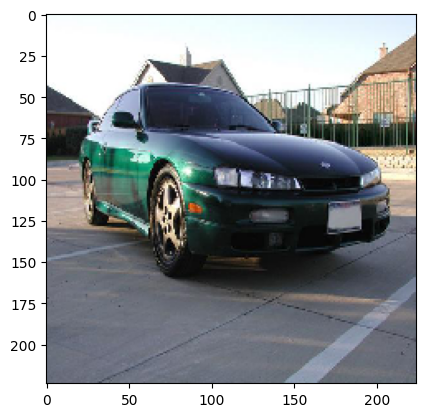

9.The Car in The  Image is:  Car -->    Land Rover LR2 SUV 2012
Name: 30, dtype: object
Probability is  0.90 
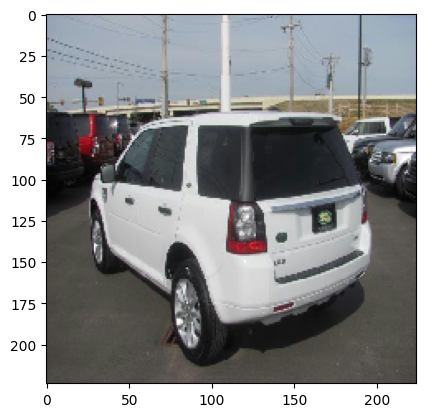

10.The Car in The  Image is:  Car -->    McLaren MP4-12C Coupe 2012
Name: 33, dtype: object
Probability is  0.66 
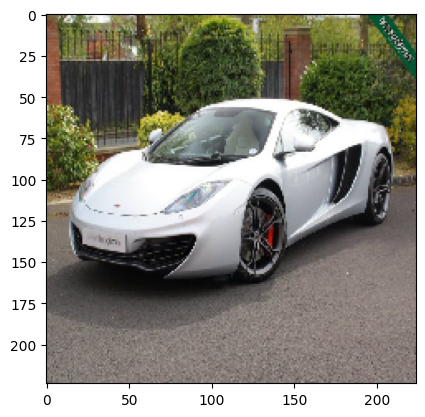


11.The Car in The  Image is:  Car -->    Aston Martin Virage 2012
Name: 7, dtype: object
Probability is  0.63 
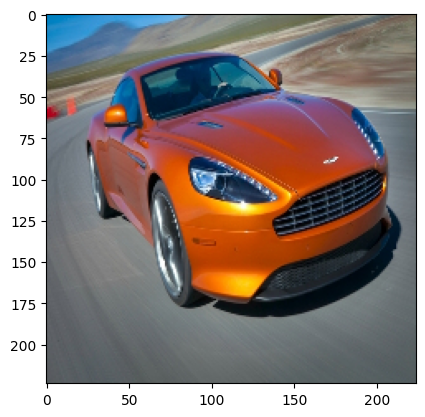

12.The Car in The  Image is:  Car -->    Lamborghini Reventon Coupe 2008
Name: 29, dtype: object
Probability is  0.51 
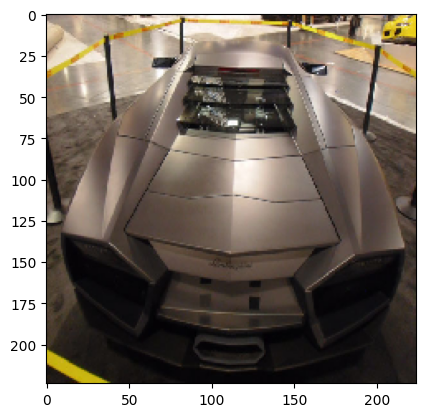



13.The Car in The  Image is:  Car -->    Acura ZDX Hatchback 2012
Name: 3, dtype: object
Probability is  0.83 
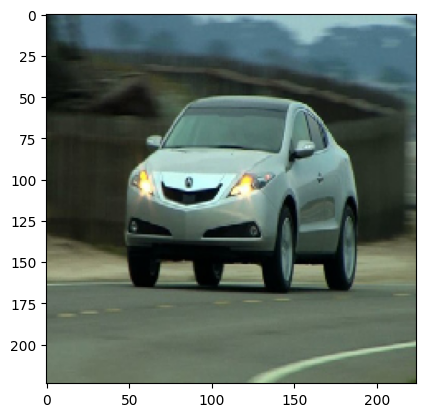

14.The Car in The  Image is:  Car -->    Aston Martin Virage Convertible 2012
Name: 6, dtype: object
Probability is  0.53 
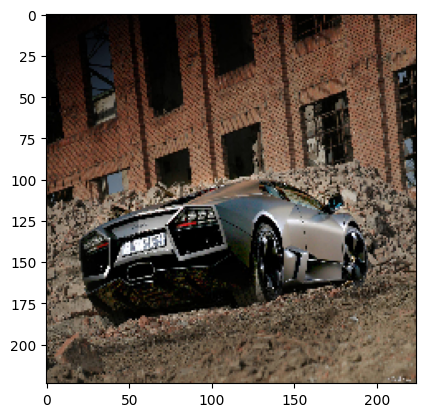